In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import time
from tqdm import tqdm
from itertools import combinations

from GA_params_class.GeneticAlgorithm import GeneticAlgorithm
from function_module import *

In [2]:
cnn_model_path = '../../Models/CNN_6_1_2.keras'
masked_sequence = 'AATACTAGAGGTCTTCCGACNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNGTGTGGGCGGGAAGACAACTAGGGG'
target_expressions = [0, 0.5, 1]
precision = None
verbose = 0
lineages = 10
test_cases = 10

In [3]:
# Run for bit_string, varying mutation rate

mutation_method = 'bit_string'
mutation_rates = np.linspace(0.01, 0.2, test_cases)

total_combinations = len(target_expressions) * len(mutation_rates) * lineages
progress_bar = tqdm(total=total_combinations, desc="Processing combinations", position=0)
initial_time = time.time()

current_combination = 0
results = []

for target_expression in target_expressions:
    for mutation_rate in mutation_rates:
        ga = GeneticAlgorithm(
            cnn_model_path=cnn_model_path,
            masked_sequence=masked_sequence,
            target_expression=target_expression,
            precision=precision,
            verbose=verbose,
            mutation=mutation_method, # Dependant variable
            mutation_rate=mutation_rate, # Dependant variable
        )
        for _ in range(lineages):
            current_combination += 1

            # Time the run
            start_time = time.time()
            best_sequences, best_predictions = ga.run()
            end_time = time.time()

            # Record the results
            for sequence, prediction in zip(best_sequences, best_predictions):
                results.append({
                    'target_expression': target_expression,
                    'mutation_method': mutation_method,
                    'mutation_rate': mutation_rate,
                    'error': abs(prediction - target_expression),
                    'run_time': (end_time - start_time) / lineages
                })
        
            # Update progress bar
            progress_bar.update(1)
            elapsed_time = time.time() - initial_time
            progress_bar.set_postfix({
                "Elapsed": format_time(elapsed_time),
                "ETA": format_time(((elapsed_time / current_combination) * (total_combinations - current_combination)))
            })

# Close progress bar
progress_bar.close()

results_df = pd.DataFrame(results)
results_df.to_csv('Data/mutation_methods/bit_string.csv', index=False)

Processing combinations:   0%|          | 0/300 [00:00<?, ?it/s]

Instructions for updating:
Use tf.identity with explicit device placement instead.


c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
Processing combinations: 100%|██████████| 300/300 [16:28<00:00,  3.29s/it, Elapsed=16.47min, ETA=0.00s]  


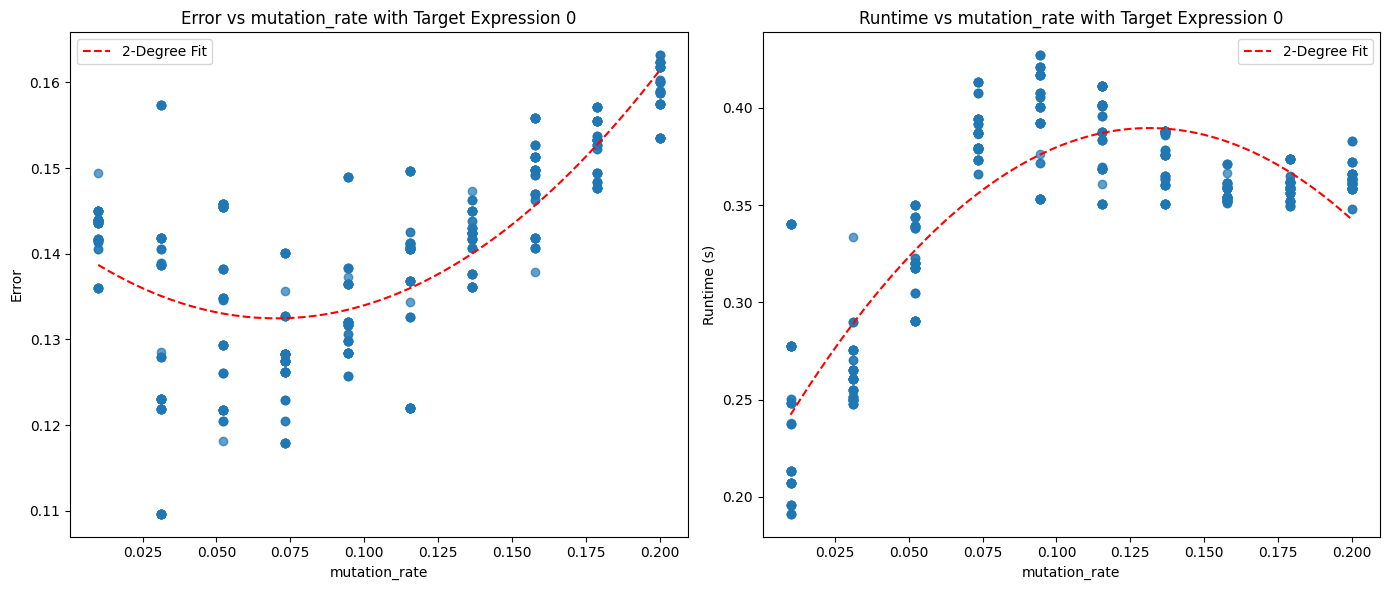

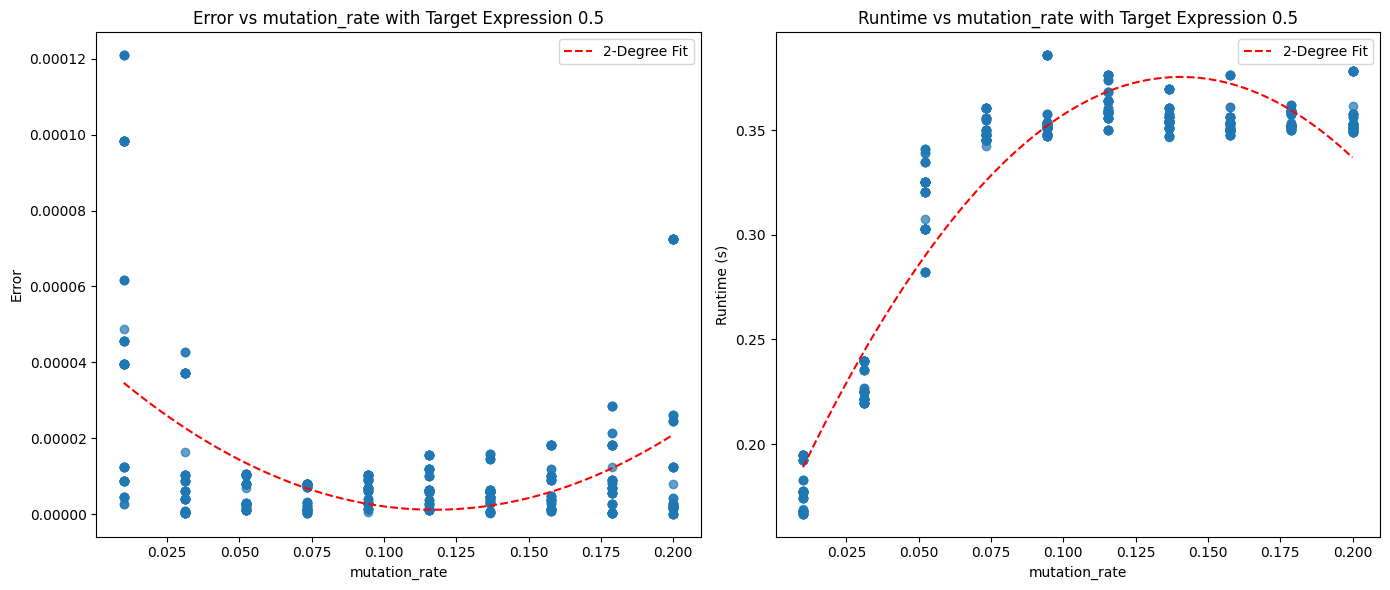

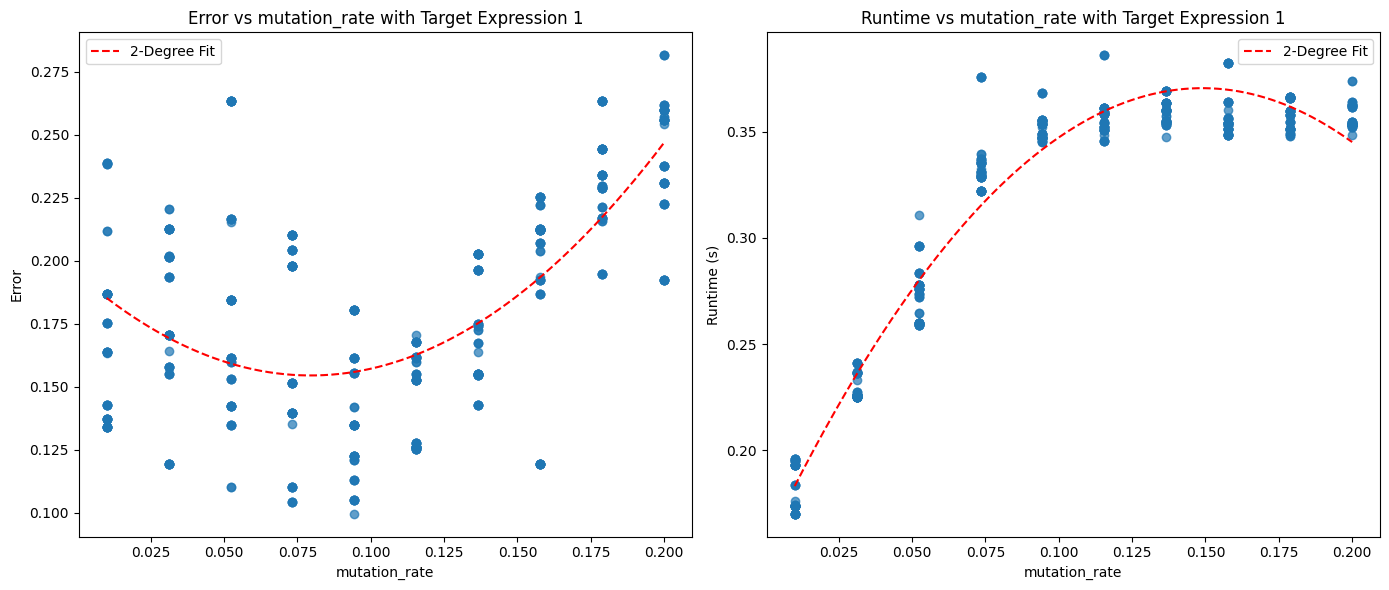

In [4]:
for target_expression in target_expressions:
    filtered_df = results_df[results_df['target_expression'] == target_expression]
    scatter_plot(filtered_df, target_expression, 'mutation_rate', polynomial_degree=2)

In [ ]:
# For each combination of mutation rate and relative mutation rate alpha, run the GA with relative_bit_string mutation method
mutation_method = 'relative_bit_string'

mutation_rates = np.linspace(0.1, 1, test_cases)
relative_mutation_rate_alphas = np.linspace(0, 1, test_cases)

total_combinations = len(target_expressions) * len(mutation_rates) * len(relative_mutation_rate_alphas) * lineages
progress_bar = tqdm(total=total_combinations, desc="Processing combinations", position=0)
initial_time = time.time()

current_combination = 0
results = []

for target_expression in target_expressions:
    for mutation_rate in mutation_rates:
        for relative_mutation_rate_alpha in relative_mutation_rate_alphas:
            ga = GeneticAlgorithm(
                cnn_model_path=cnn_model_path,
                masked_sequence=masked_sequence,
                target_expression=target_expression,
                precision=precision,
                verbose=verbose,
                mutation=mutation_method, # Dependant variable
                mutation_rate=mutation_rate, # Dependant variable
                relative_mutation_rate_alpha=relative_mutation_rate_alpha, # Dependant variable
            )
            for _ in range(lineages):
                current_combination += 1

                # Time the run
                start_time = time.time()
                best_sequences, best_predictions = ga.run()
                end_time = time.time()

                # Record the results
                for sequence, prediction in zip(best_sequences, best_predictions):
                    results.append({
                        'target_expression': target_expression,
                        'mutation_method' : mutation_method,
                        'mutation_rate': mutation_rate,
                        'relative_mutation_rate_alpha': relative_mutation_rate_alpha,
                        'error': abs(prediction - target_expression),
                        'run_time': (end_time - start_time) / lineages
                    })
            
                # Update progress bar
                progress_bar.update(1)
                elapsed_time = time.time() - initial_time
                progress_bar.set_postfix({
                    "Elapsed": format_time(elapsed_time),
                    "ETA": format_time(((elapsed_time / current_combination) * (total_combinations - current_combination)))
                })

# Close progress bar
progress_bar.close()

gresults_df = pd.DataFrame(results)
results_df.to_csv('Data/mutation_methods/relative_bit_string.csv', index=False)

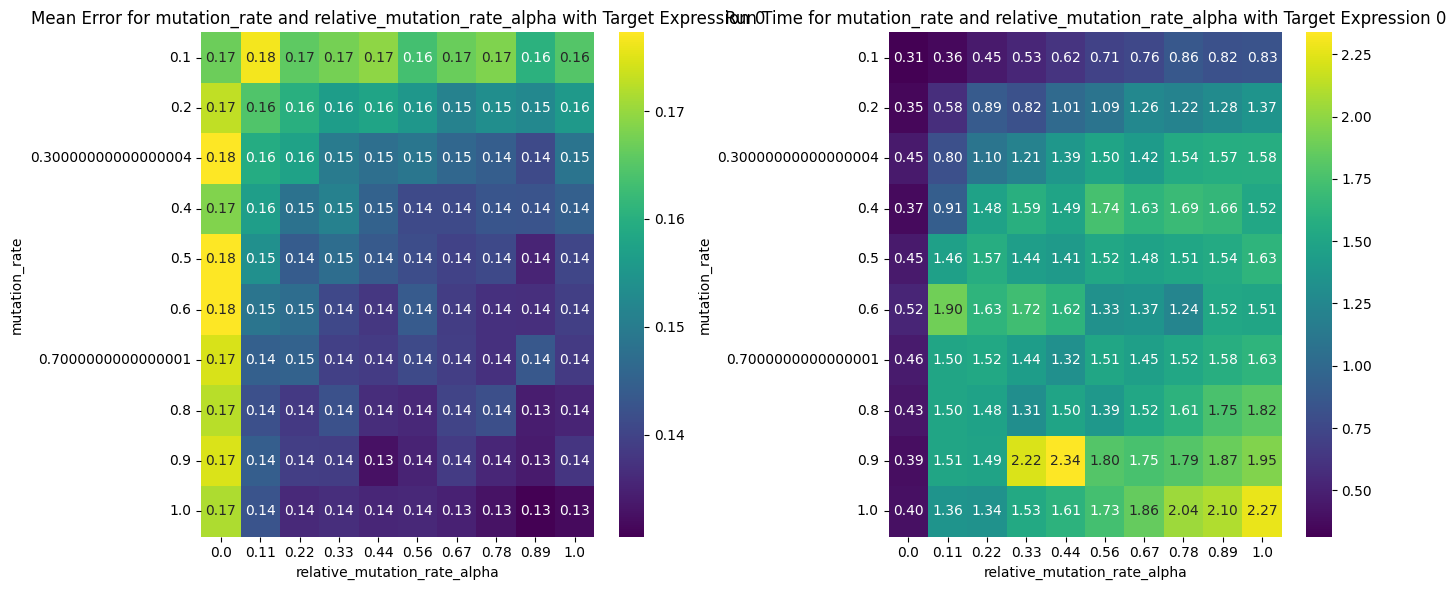

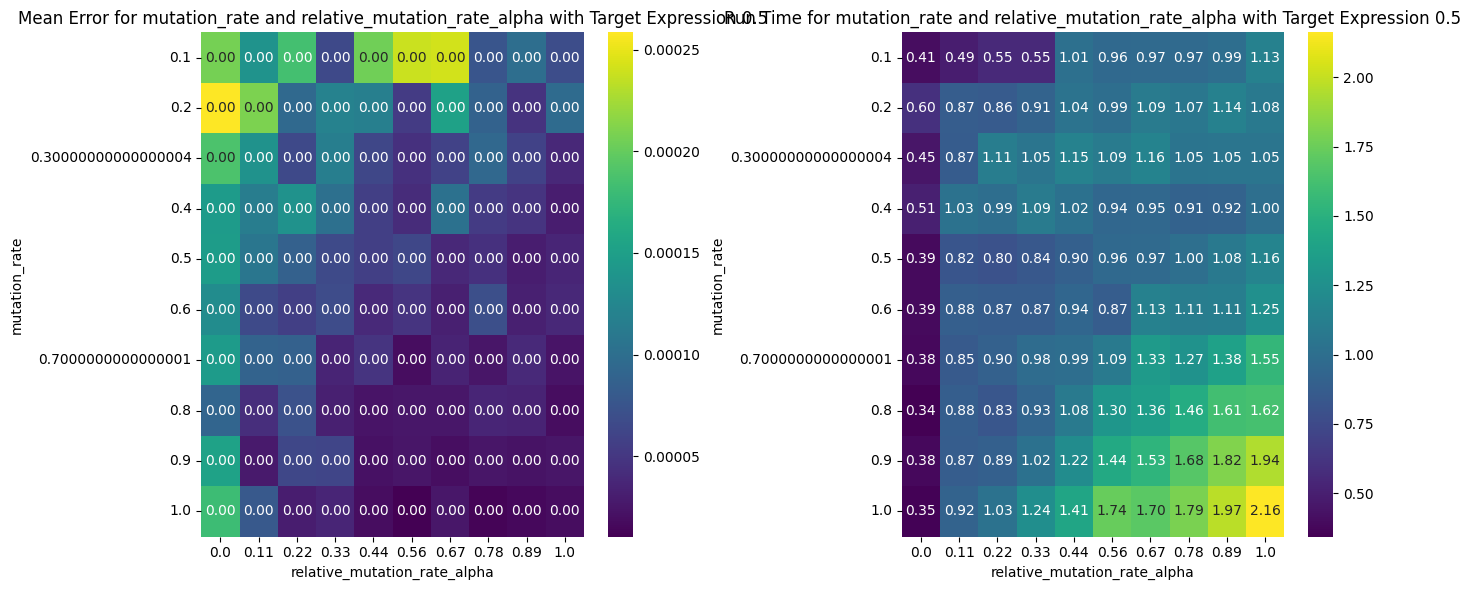

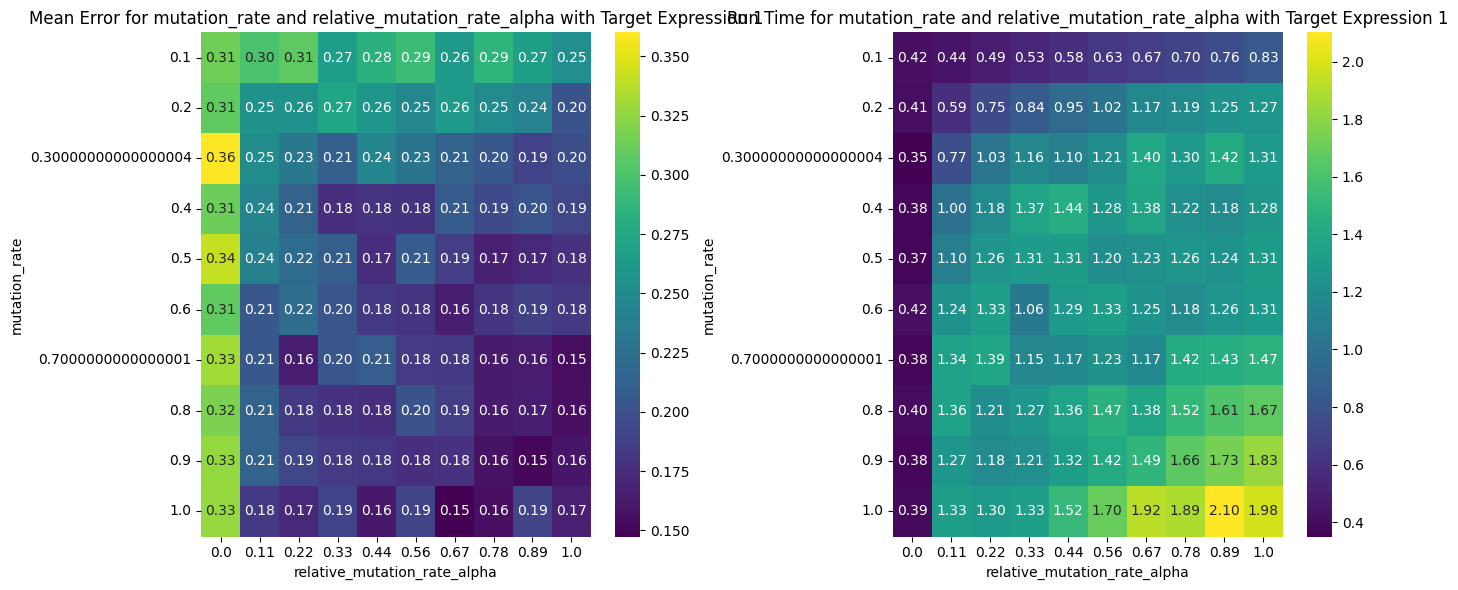

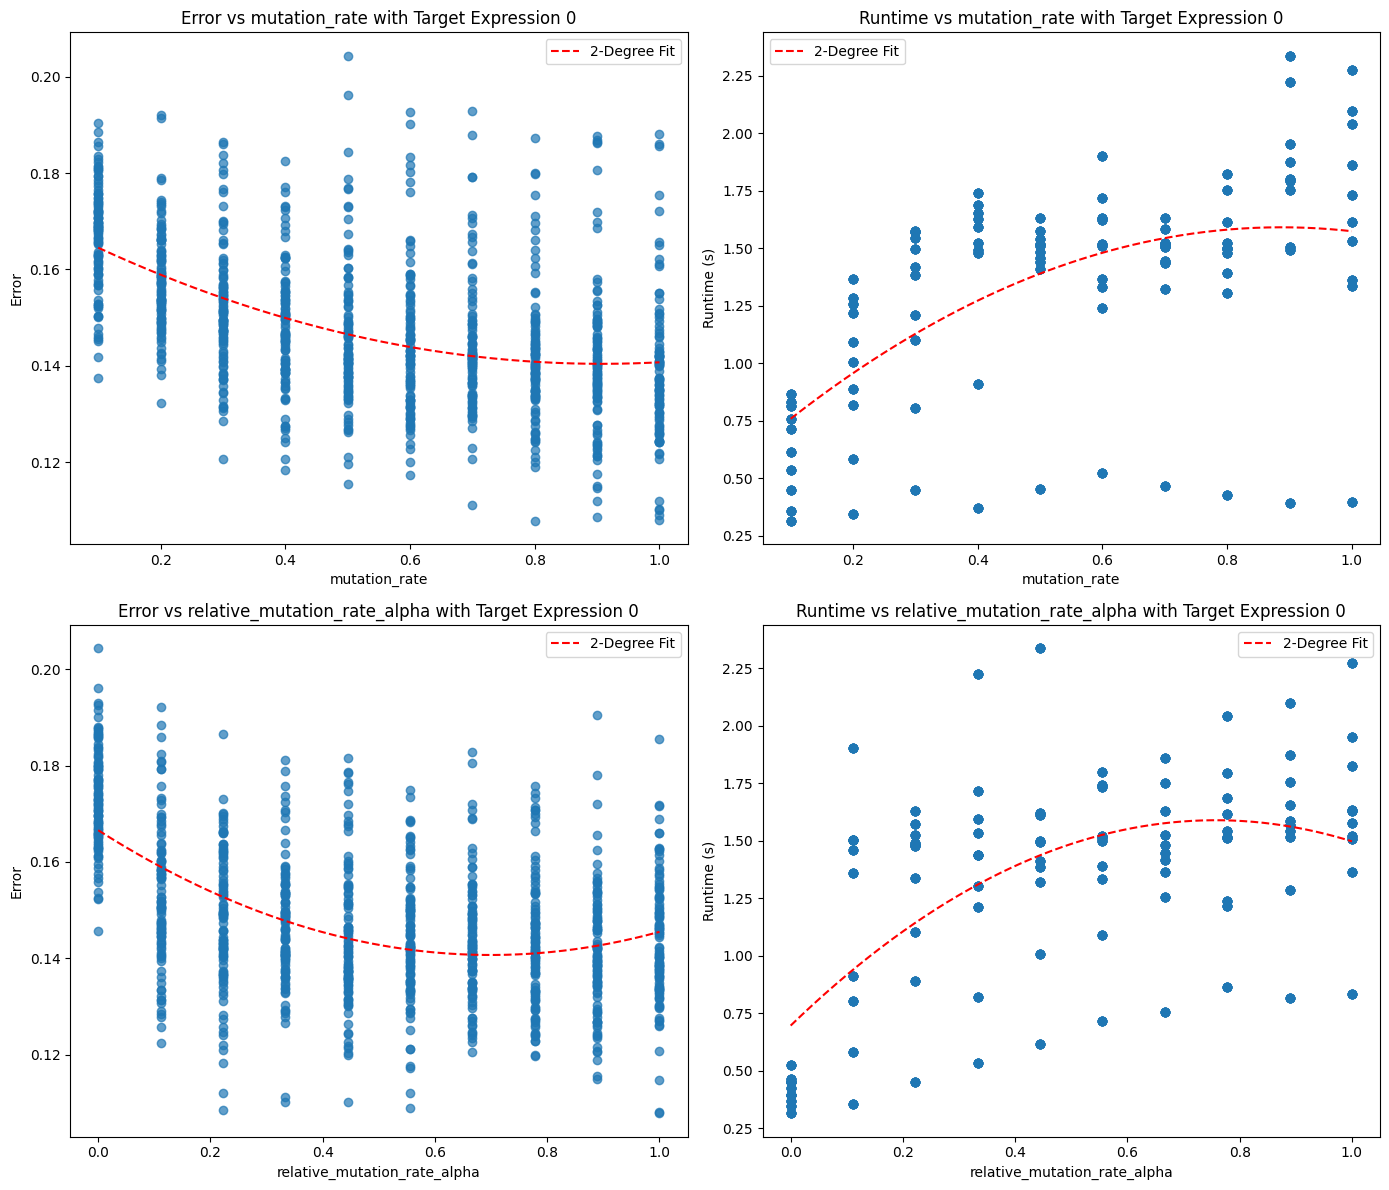

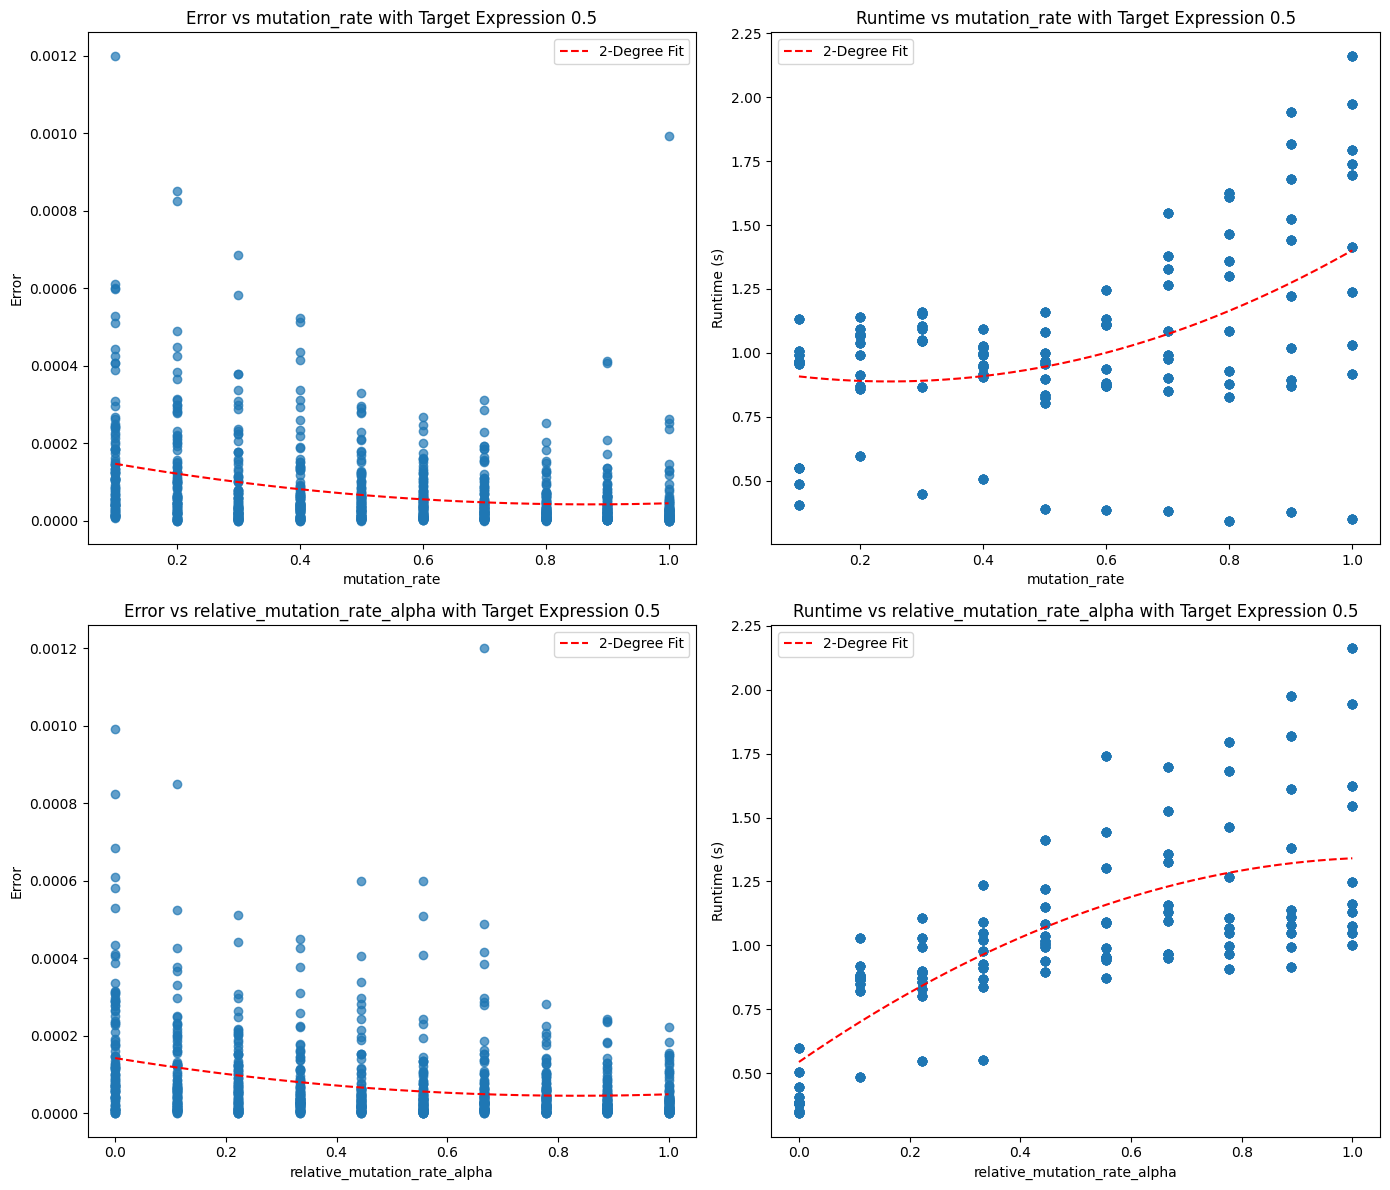

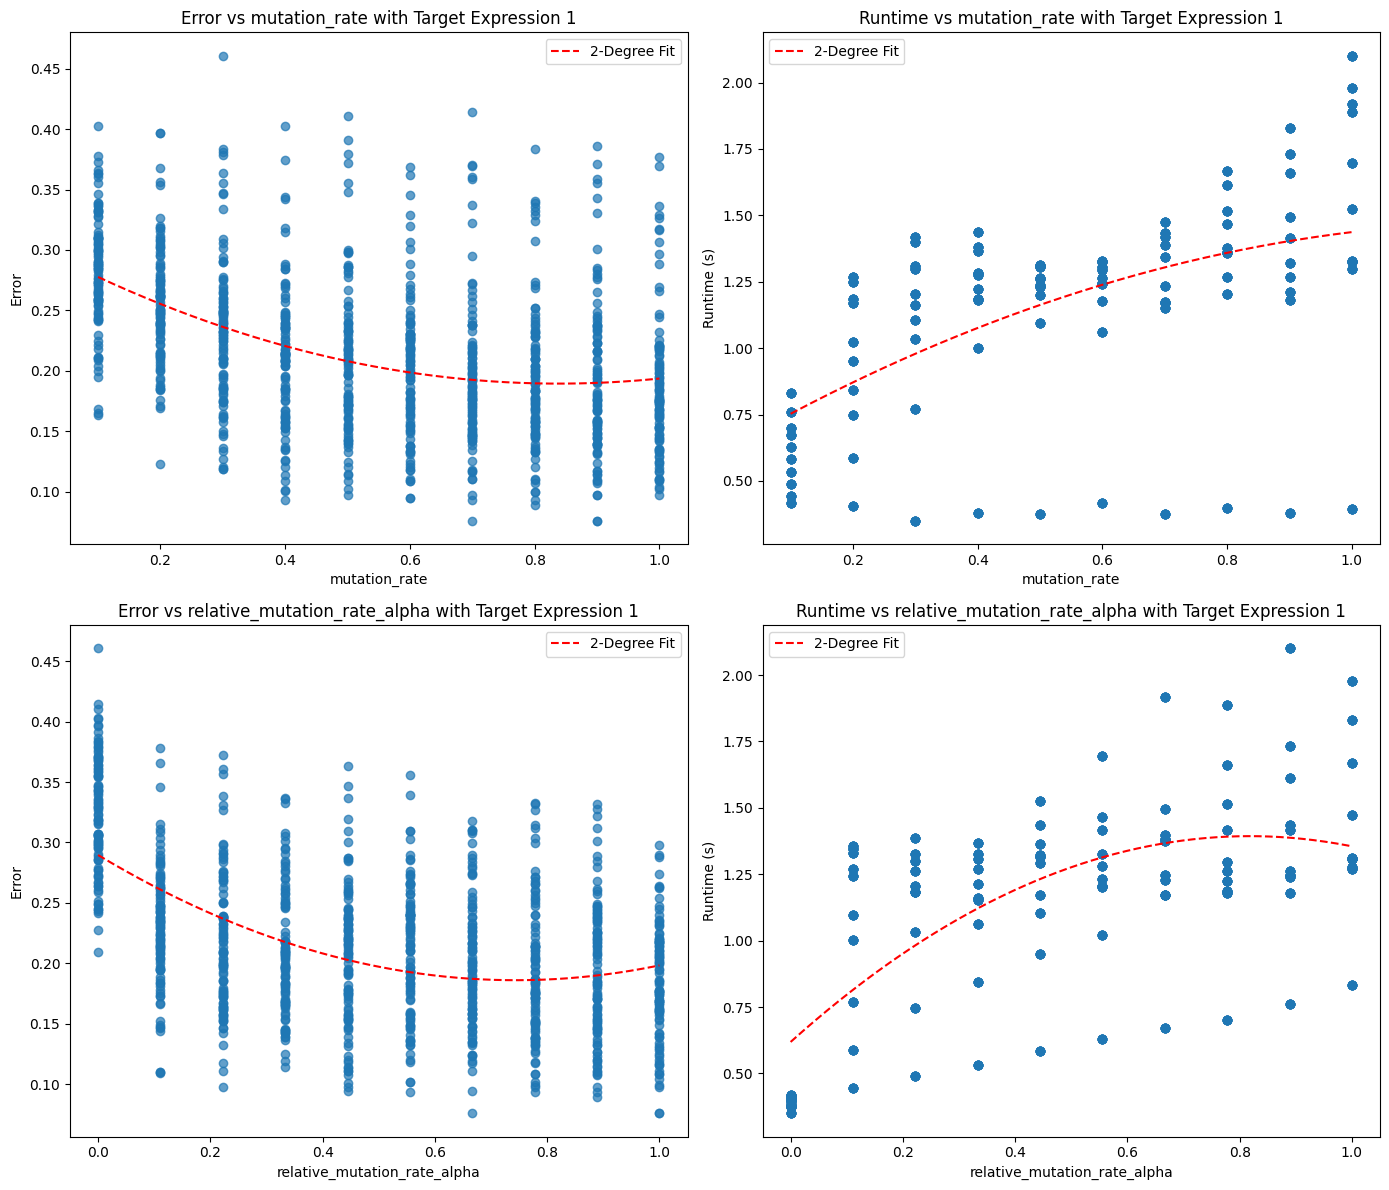

In [22]:
for target_expression in target_expressions:
    filtered_df = gresults_df[gresults_df['target_expression'] == target_expression]
    heatmap(filtered_df, target_expression, 'mutation_rate', 'relative_mutation_rate_alpha')

In [6]:
mutation_methods = ['bit_string', 'relative_bit_string']
mutation_rates = {'bit_string': 0.75, 'relative_bit_string': 1}

total_combinations = len(target_expressions) * len(mutation_methods) * lineages
progress_bar = tqdm(total=total_combinations, desc="Processing combinations", position=0)
initial_time = time.time()

current_combination = 0
results = []

for target_expression in target_expressions:
    for mutation_method in mutation_methods:
        ga = GeneticAlgorithm(
            cnn_model_path=cnn_model_path,
            masked_sequence=masked_sequence,
            target_expression=target_expression,
            precision=precision,
            verbose=verbose,
            mutation=mutation_method, # Dependant variable
            mutation_rate=mutation_rates[mutation_method], # Dependant variable previously found
        )
        for _ in range(lineages):
            current_combination += 1

            # Time the run
            start_time = time.time()
            best_sequences, best_predictions = ga.run()
            end_time = time.time()

            # Record the results
            for sequence, prediction in zip(best_sequences, best_predictions):
                results.append({
                    'target_expression': target_expression,
                    'mutation_method': mutation_method,
                    'mutation_rate': mutation_rates[mutation_method],
                    'error': abs(prediction - target_expression),
                    'run_time': (end_time - start_time) / lineages
                })
        
            # Update progress bar
            progress_bar.update(1)
            elapsed_time = time.time() - initial_time
            progress_bar.set_postfix({
                "Elapsed": format_time(elapsed_time),
                "ETA": format_time(((elapsed_time / current_combination) * (total_combinations - current_combination)))
            })

# Close progress bar
progress_bar.close()

results_df = pd.DataFrame(results)
results_df.to_csv('Data/mutation_methods/comparison.csv', index=False)

Processing combinations: 100%|██████████| 60/60 [03:01<00:00,  3.02s/it, Elapsed=3.02min, ETA=0.00s]  


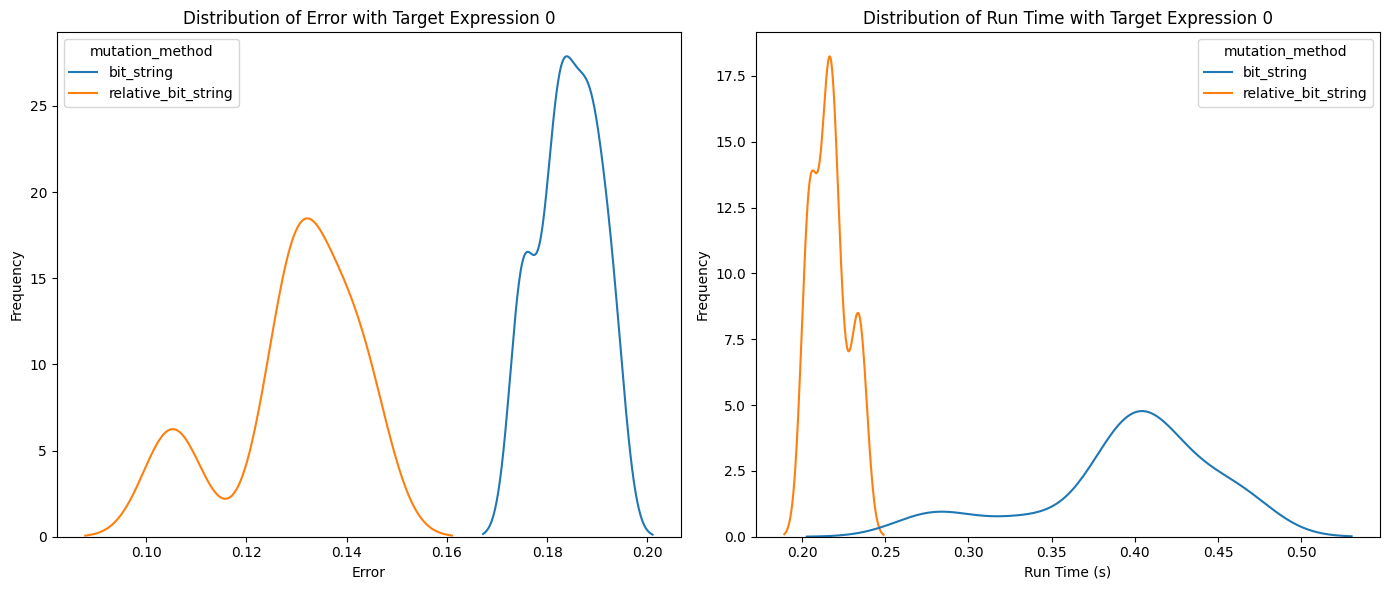

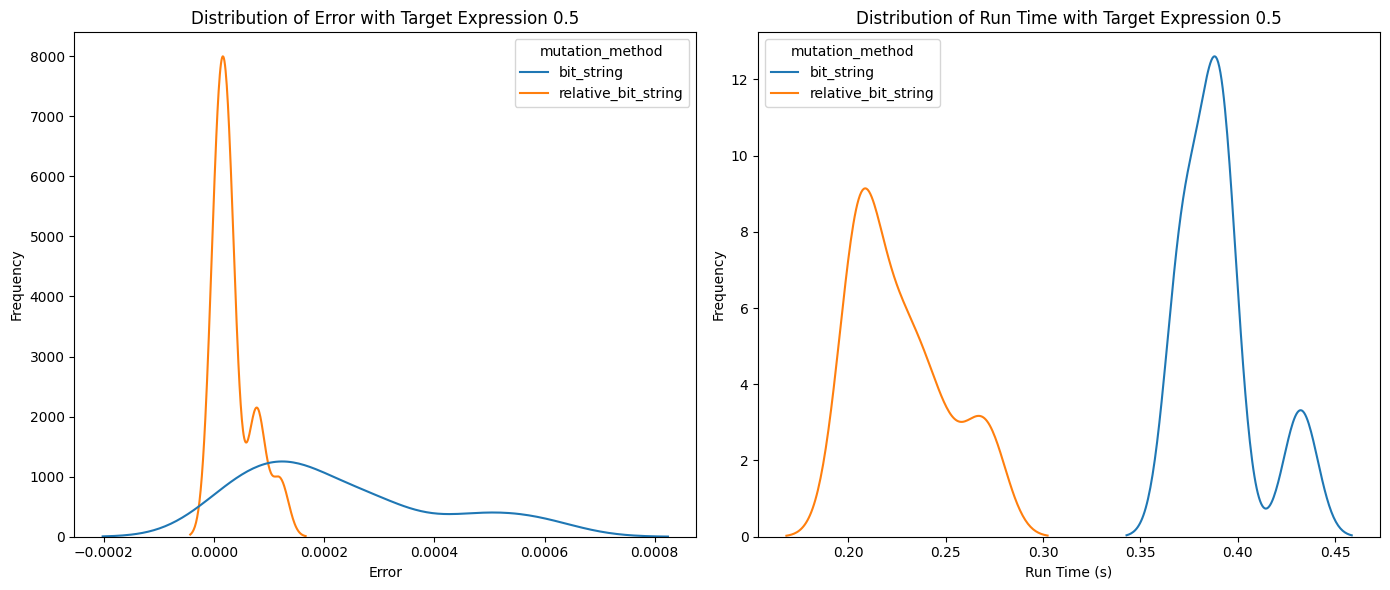

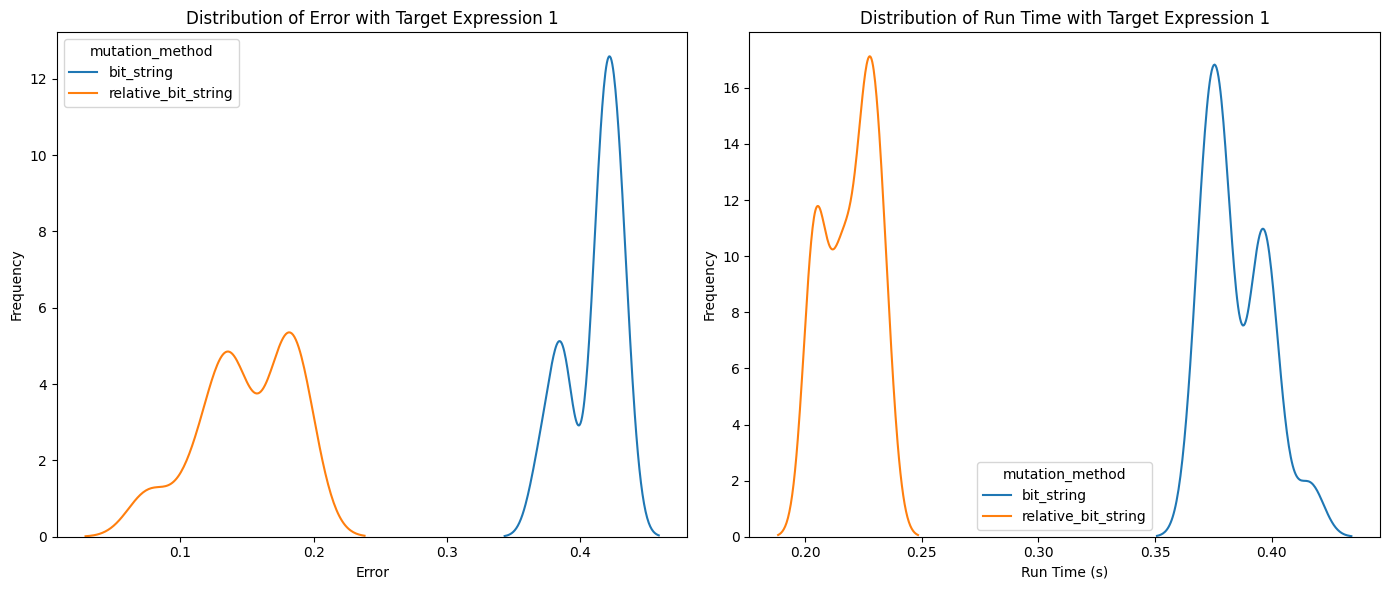

In [7]:
for target_expression in target_expressions:
    filter_df = results_df[results_df['target_expression'] == target_expression]
    distribution_plot(filter_df, target_expression, 'mutation_method')